## Importing Libraries

In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Generating Synthetic Flow pattern Data

In [2]:
# Define ranges for each parameter
oil_density_range = [700, 1000] # kg/m^3
gas_density_range = [0.1, 100] # kg/m^3
oil_viscosity_range = [0.1, 1] # Pa*s
gas_viscosity_range = [0.01, 0.1] # Pa*s
surface_tension_range = [0.01, 0.1] # N/m
flow_rate_range = [1, 50] # m^3/h
pipe_diameter_range = [0.1, 1] # m

# Define flow pattern thresholds
bubble_flow_threshold = 0.2
stratified_flow_threshold = 0.4
annular_flow_threshold = 0.6
slug_flow_threshold = 0.8

# Generate synthetic data
num_samples = 1000
data = []
for i in range(num_samples):
    oil_density = random.uniform(oil_density_range[0], oil_density_range[1])
    gas_density = random.uniform(gas_density_range[0], gas_density_range[1])
    oil_viscosity = random.uniform(oil_viscosity_range[0], oil_viscosity_range[1])
    gas_viscosity = random.uniform(gas_viscosity_range[0], gas_viscosity_range[1])
    surface_tension = random.uniform(surface_tension_range[0], surface_tension_range[1])
    flow_rate = random.uniform(flow_rate_range[0], flow_rate_range[1])
    pipe_diameter = random.uniform(pipe_diameter_range[0], pipe_diameter_range[1])
    
    # Calculate flow pattern based on parameter values
    superficial_velocity_gas = flow_rate / (gas_density * (3.14/4) * pipe_diameter**2)
    superficial_velocity_liquid = flow_rate / ((oil_density+gas_density)/2 * (3.14/4) * pipe_diameter**2)
    reynolds_number_gas = (gas_density * superficial_velocity_gas * pipe_diameter) / gas_viscosity
    reynolds_number_liquid = ((oil_density+gas_density)/2 * superficial_velocity_liquid * pipe_diameter) / oil_viscosity
    froude_number = superficial_velocity_liquid / (pipe_diameter * (9.81 * (oil_density-oil_density/2) / oil_density)**0.5)
    weber_number = (gas_density * (surface_tension**3) * superficial_velocity_gas**2) / ((oil_density+gas_density)/2)
    
    if weber_number > slug_flow_threshold:
        flow_pattern = 'Slug flow'
    elif weber_number > annular_flow_threshold:
        flow_pattern = 'Annular flow'
    elif froude_number > stratified_flow_threshold:
        flow_pattern = 'Stratified flow'
    elif reynolds_number_liquid > bubble_flow_threshold and froude_number < stratified_flow_threshold:
        flow_pattern = 'Intermittent flow'
    else:
        flow_pattern = 'Bubble flow'
    
    # Append data to list
    data.append([oil_density, gas_density, oil_viscosity, gas_viscosity, surface_tension, flow_rate, pipe_diameter, flow_pattern])


## Exploratory Data Analysis

In [3]:
# Split data into training and testing sets
X = [d[:-1] for d in data]
y = [d[-1] for d in data]

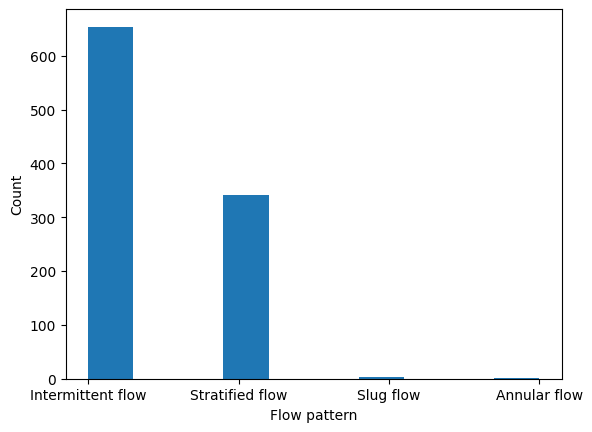

In [4]:
#Distribution of the target variable: 
plt.hist(y)
plt.xlabel('Flow pattern')
plt.ylabel('Count')
plt.show()

/var/folders/w0/68crwpdx22dc2ypx902gtj9m0000gn/T/ipykernel_33662/3277975450.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


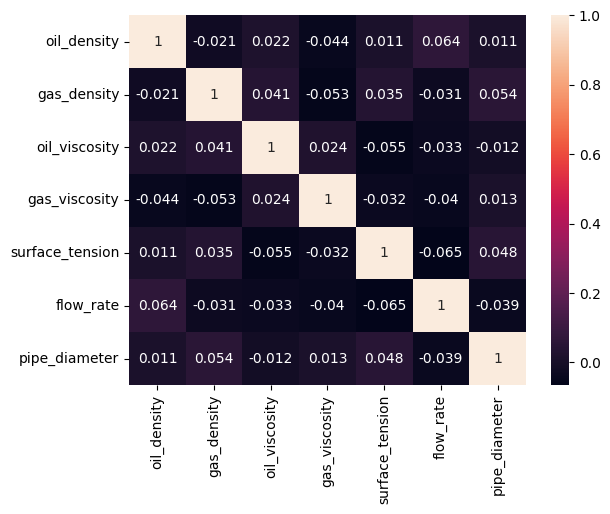

In [5]:
#Correlation matrix
df = pd.DataFrame(data, columns=['oil_density', 'gas_density', 'oil_viscosity', 'gas_viscosity', 'surface_tension', 'flow_rate', 'pipe_diameter', 'flow_pattern'])
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)
plt.show()

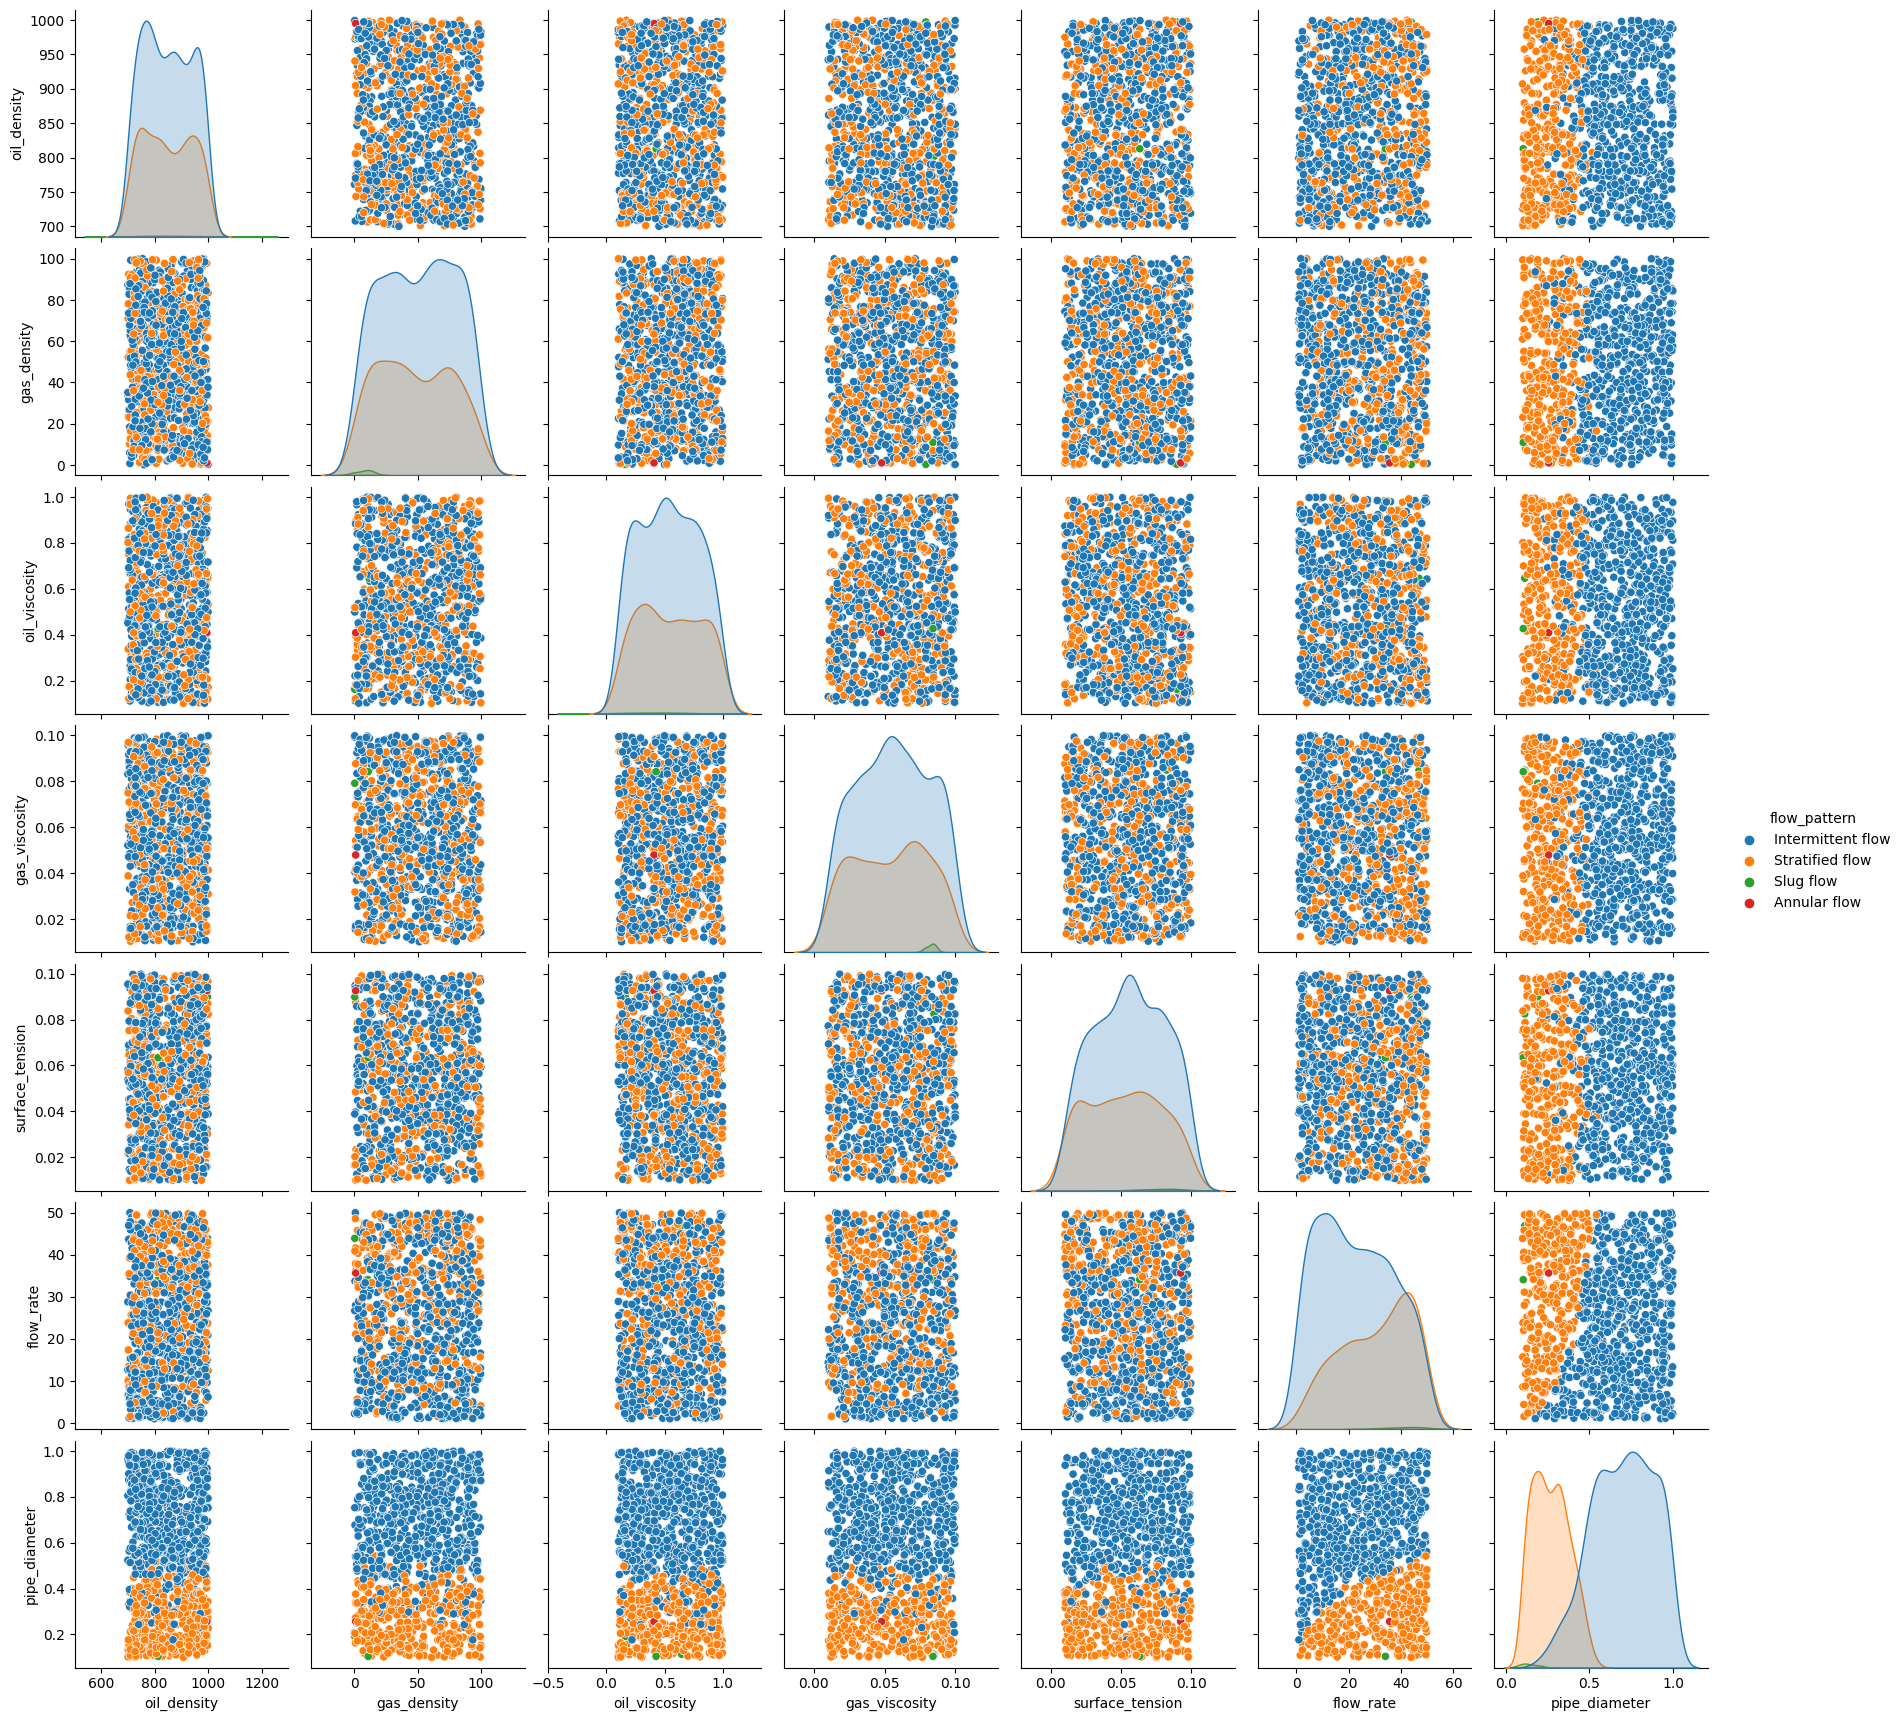

In [8]:
#Pair plot
sns.pairplot(df, hue='flow_pattern')
plt.show()

## Training Our Decision Tree Classifier

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree classifier

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the classifier on the test set
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.955
